# Trabajando con los datos

**Matriz multidimensional**

In [1]:
import math, random
from matplotlib import pyplot as plt

In [2]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [3]:
def make_matrix(num_rows, num_cols, entry_fn):
    """devuelve una matriz num_rows x num_cols
     cuya (i, j) -th entrada es entry_fn (i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]

In [4]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [5]:
def get_column(A, j):
    return [A_i[j] for A_i in A]

In [6]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [7]:
def variance(x):
    """asume que x tiene al menos dos elementos"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [8]:
def mean(x):
    return sum(x) / len(x)

In [9]:
def de_mean(x):
    """traduce x restando su media (por lo que el resultado tiene una media de 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [10]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [11]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [12]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


In [13]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """encontrar inverso aproximado utilizando la búsqueda binaria"""

    # si no es estándar, computar estándar y volver a escalar
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf (-10) es (muy cerca de) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf (10) es (muy cerca de) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # considera el punto medio
        mid_p = normal_cdf(mid_z)      # y el valor del cdf allí
        if mid_p < p:
            # el punto medio sigue siendo demasiado bajo, busque por encima
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # el punto medio sigue siendo demasiado alto, busque debajo de él
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

**Matriz de correlación**

In [14]:
def correlation_matrix(data):
    """devuelve la matriz num_columns x num_columns cuya (i, j) th entrada
     Es la correlación entre las columnas i y j de datos."""

    _, num_columns = shape(data)

    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))

    return make_matrix(num_columns, num_columns, matrix_entry)

In [16]:
def make_scatterplot_matrix():
    
    # Primero, genera algunos datos aleatorios.

    num_points = 100

    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    random.seed(0)
    data = [random_row()
            for _ in range(num_points)]
    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):

            # dispersar column_j en el eje x vs column_i en el eje y
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

            # sino que muestre i == j, en cuyo caso muestre el nombre de la serie
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # luego oculte las etiquetas de los ejes, excepto los gráficos de la izquierda y la parte inferior
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)

    # corregir las etiquetas de los ejes inferior derecho e izquierdo, que están mal porque
    # sus gráficos solo tienen texto en ellos
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()

In [17]:
def random_normal():
    """devuelve un sorteo aleatorio de una distribución normal estándar"""
    return inverse_normal_cdf(random.random())

In [18]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

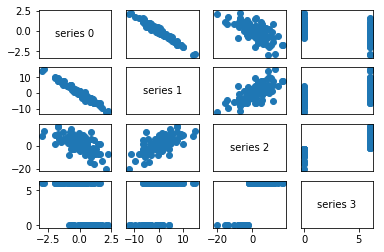

In [19]:
make_scatterplot_matrix()